<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from pandas_datareader import data, wb
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # Allow matplotlib have access to timestamp 
import matplotlib.ticker as mplticker

In [2]:
# Retrieve data from FRED, check my notebook for pandareader's user guide
start = dt.datetime(1952, 1, 1)
end = dt.datetime.today()
FedSurplus = pdr.data.DataReader('FYFSGDA188S', 'fred', start, end)
CorpDebtToEquity = pdr.data.DataReader('NCBCMDPMVCE', 'fred', start, end)

In [3]:
GDP = pdr.data.DataReader('GDP', 'fred', start, end)
CorpDebtAndLoans = pdr.data.DataReader('BCNSDODNS', 'fred', start, end)

In [4]:
CorpDebtAndLoansToGDP = (CorpDebtAndLoans['BCNSDODNS']/GDP['GDP'])*100

In [9]:
CorpDebtAndLoansToGDP

DATE
1952-01-01    22.228614
1952-04-01    22.549650
1952-07-01    22.625176
1952-10-01    22.346460
1953-01-01    22.349348
                ...    
2020-01-01    49.733657
2020-04-01    57.047556
2020-07-01    52.318045
2020-10-01    51.731566
2021-01-01    50.630018
Length: 277, dtype: float64

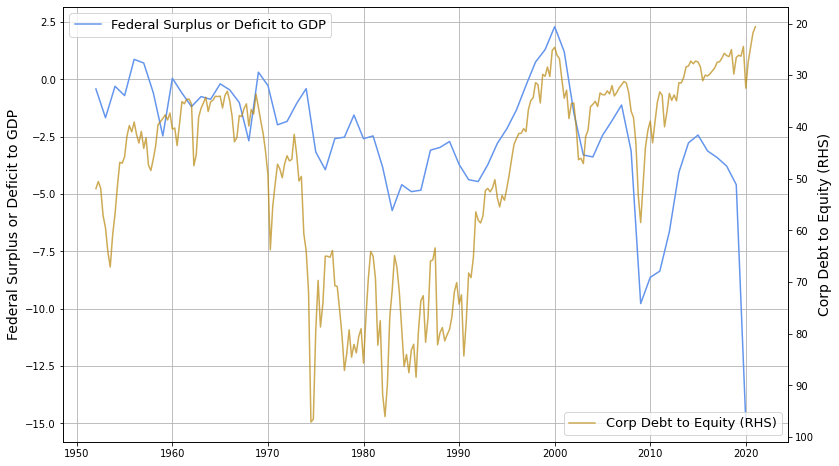

In [6]:
fig, ax = plt.subplots(figsize = (13, 8))
ax.plot(FedSurplus, color = 'CornflowerBlue', alpha = 1, label = 'Federal Surplus or Deficit to GDP')
ax.set_ylabel('Federal Surplus or Deficit to GDP', size = 14)

ax_RHS = ax.twinx() # share the same x-axis
ax_RHS.plot(CorpDebtToEquity, color = 'DarkGoldenRod', alpha = .7, label = 'Corp Debt to Equity (RHS)')
#ax_RHS.plot(CorpDebtAndLoansToGDP, color = 'LightSeaGreen', alpha = .7, label = 'Corp Debt and Loan to GDP (RHS)')
ax_RHS.set_ylabel('Corp Debt to Equity (RHS)', size = 14)

ax_RHS.invert_yaxis()
ax.legend(fontsize = 13)
ax_RHS.legend(fontsize = 13, loc = 'lower right')
ax.grid()
plt.show()